MUSHROOM CLASSIFICATION

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('mushrooms.csv')
df.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
unique_classes=df['class'].unique()
unique_classes

array(['p', 'e'], dtype=object)

In [7]:
df["cap-shape"] = df["cap-shape"].map({'b': "bell", 'c': "conical", 'x': "convex", 'f': "flat", 'k': "knobbed", 's': "sunken"})
df["cap-surface"] = df["cap-surface"].map({'s': "smooth", 'f': "fibrous", 'y': "scaly", 'g': "grooves"})
df["cap-color"] = df["cap-color"].map({'n': "brown", 'b': "buff", 'c': "cinnamon", 'g': "grey", 'r': "green", 'p': "pink", 'u': "purple", 'e': "red", 'w': "white", 'y': "yellow"})
df["bruises"] = df["bruises"].map({'t': 1, 'f': 0})
df["odor"] = df["odor"].map({'a': "almond", 'l': "anise", 'c': "creosote", 'y': "fishy", 'f': "foul", 'm': "musty", 'n': "none", 'p': "pungent", 's': "spicy"})
df["gill-attachment"] = df["gill-attachment"].map({'a': "attached", 'd': "descending", 'f': "free", 'n': "notched"})
df["gill-spacing"] = df["gill-spacing"].map({'c': "closed", 'w': "crowded", 'd': "distant"})
df["gill-size"] = df["gill-size"].map({'b': "broad", 'n': "narrow"})
df["gill-color"] = df["gill-color"].map({'k': "black", 'n': "brown", 'b': "buff", 'h': "chocolate", 'c': "cinnamon", 'g': "grey", 'r': "green", 'p': "pink", 'o': "orange", 'u': "purple", 'e': "red", 'w': "white", 'y': "yellow"})
df["stalk-shape"] = df["stalk-shape"].map({'e': "enlarging", 't': "tapering"})
df["stalk-root"] = df["stalk-root"].map({'e': "equal", 'c': "club", 'b': "bulbous", 'u': "cup", 'z': "rhizomorphs", 'r': "rooted", '?': "missing"})
df["stalk-surface-above-ring"] = df["stalk-surface-above-ring"].map({'s': "smooth", 'f': "fibrous", 'y': "scaly", 'k': "silky"})
df["stalk-surface-below-ring"] = df["stalk-surface-below-ring"].map({'s': "smooth", 'f': "fibrous", 'y': "scaly", 'k': "silky"})
df["stalk-color-above-ring"] = df["stalk-color-above-ring"].map({'n': "brown", 'b': "buff", 'o': "orange", 'c': "cinnamon", 'g': "grey", 'r': "green", 'p': "pink", 'u': "purple", 'e': "red", 'w': "white", 'y': "yellow"})
df["stalk-color-below-ring"] = df["stalk-color-below-ring"].map({'n': "brown", 'b': "buff", 'o': "orange",'c': "cinnamon", 'g': "grey", 'r': "green", 'p': "pink", 'u': "purple", 'e': "red", 'w': "white", 'y': "yellow"})
df["veil-type"] = df["veil-type"].map({'p': "partial", 'u': "universal"})
df["veil-color"] = df["veil-color"].map({'n': "brown", 'o': "orange", 'w': "white", 'y': "yellow"})
df["ring-number"] = df["ring-number"].map({'n': "none", 'o': "one", 't': "two"})
df["ring-type"] = df["ring-type"].map({'c': "cobwebby", 'e': "evanescent", 'f': "flaring", 'l': "large", 'n': "none", 'p': "pendant", 's': "sheathing", 'z': "zone"})
df["spore-print-color"] = df["spore-print-color"].map({'k': "black", 'n': "brown", 'b': "buff", 'h': "chocolate", 'c': "cinnamon", 'r': "green", 'p': "pink", 'o': "orange", 'u': "purple", 'w': "white", 'y': "yellow"})
df["population"] = df["population"].map({'a': "abundant", 'c': "clustered", 'n': "numerous", 's': "scattered", 'v': "several", 'y': "solitary"})
df["habitat"] = df["habitat"].map({'g': "grasses", 'l': "leaves", 'm': "meadows", 'p': "paths", 'u': "urban", 'w': "waste", 'd': "woords"})

In [8]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,convex,smooth,brown,1,pungent,free,closed,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,e,convex,smooth,yellow,1,almond,free,closed,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,e,bell,smooth,white,1,anise,free,closed,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,p,convex,scaly,white,1,pungent,free,closed,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,e,convex,smooth,grey,0,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [9]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                      int64
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [10]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [11]:
print(df['population'].value_counts())

several      4040
solitary     1712
scattered    1248
numerous      400
abundant      384
clustered     340
Name: population, dtype: int64


In [12]:
le=LabelEncoder()

In [13]:
df_cp_values=pd.DataFrame(df[['population','class','habitat']].value_counts())

In [14]:
df_cp_values

0
population class habitat     
several    e     woords   984
           p     woords   920
solitary   e     woords   896
several    p     paths    792
scattered  e     grasses  704
several    p     leaves   576
                 grasses  388
abundant   e     grasses  384
numerous   e     grasses  272
solitary   p     paths    216
                 grasses  216
                 woords   216
clustered  e     waste    192
several    e     leaves   144
           p     urban    136
scattered  p     urban    136
                 grasses  136
           e     meadows  128
numerous   e     meadows  128
scattered  p     woords    96
clustered  e     leaves    96
solitary   e     paths     72
scattered  e     paths     48
solitary   e     grasses   48
                 urban     48
several    e     urban     48
           p     meadows   36
clustered  p     woords    36
                 leaves    16
several    e     paths     16

In [15]:
df.describe()

,bruises
count,8124.000000
mean,0.415559
std,0.492848
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   int64 
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [17]:
count=df['class'].value_counts()
count

e    4208
p    3916
Name: class, dtype: int64

In [18]:
df['veil-type'].value_counts()

partial    8124
Name: veil-type, dtype: int64

In [19]:
df['veil-type']

0       partial
1       partial
2       partial
3       partial
4       partial
         ...   
8119    partial
8120    partial
8121    partial
8122    partial
8123    partial
Name: veil-type, Length: 8124, dtype: object

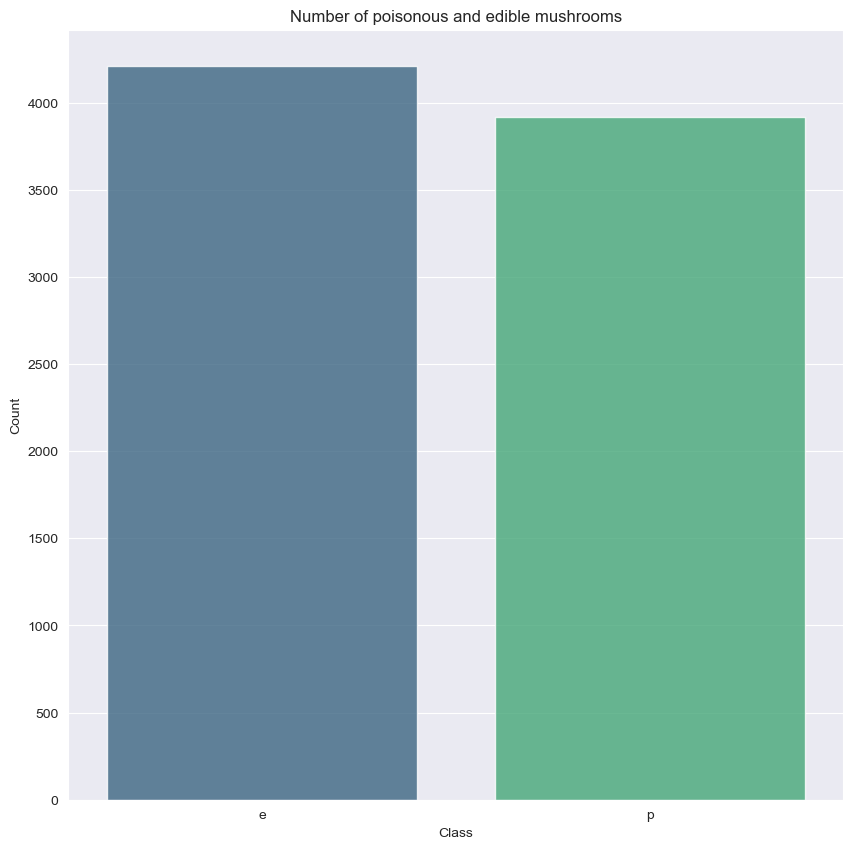

In [20]:
count = df['class'].value_counts()
plt.figure(figsize=(10,10))
sns.barplot(x=count.index, y=count.values, alpha=0.8, palette="viridis")
plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Number of poisonous and edible mushrooms')
plt.show()

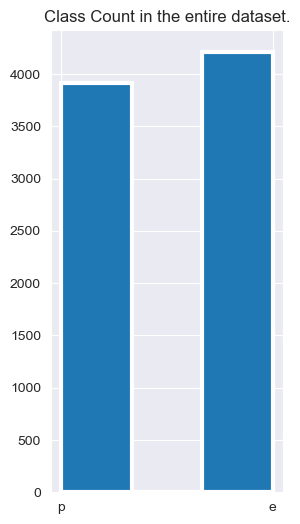

In [21]:
fig,ax=plt.subplots(1,figsize=(3,6))
ax.hist(df['class'], bins=3, linewidth=3,edgecolor="white")
ax.set_title("Class Count in the entire dataset.")
fig.show()

In [22]:
df=df.astype('category')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [24]:
df['veil-type']

0       partial
1       partial
2       partial
3       partial
4       partial
         ...   
8119    partial
8120    partial
8121    partial
8122    partial
8123    partial
Name: veil-type, Length: 8124, dtype: category
Categories (1, object): ['partial']

In [25]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,convex,scaly,brown,0,none,free,closed,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woords
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [26]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [27]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,1,7,1,0,1,0,...,3,7,7,0,2,1,4,0,3,4
1,0,2,3,9,1,0,1,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,0,3,8,1,1,1,0,0,1,...,3,7,7,0,2,1,4,1,2,2
3,1,2,2,8,1,7,1,0,1,1,...,3,7,7,0,2,1,4,0,3,4
4,0,2,3,4,0,6,1,1,0,0,...,3,7,7,0,2,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,4,3,0,0,6,0,0,0,11,...,3,4,4,0,1,1,4,2,1,1
8120,0,2,3,0,0,6,0,0,0,11,...,3,4,4,0,0,1,4,2,4,1
8121,0,3,3,0,0,6,0,0,0,1,...,3,4,4,0,1,1,4,2,1,1
8122,1,4,2,0,0,3,1,0,1,2,...,2,7,7,0,2,1,0,7,4,1


In [28]:
X = df.drop('class', axis=1)
y = df['class']
feature_columns = X.columns

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=125)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [30]:
print("Number of train and test data", "\nTrain:", len(X_train), "\nTest:", len(X_test))

Number of train and test data 
Train: 5686 
Test: 2438


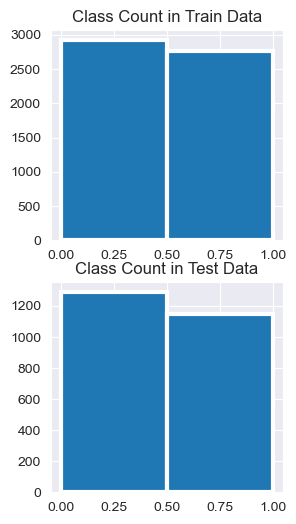

In [31]:
fig, (ax1,ax2) = plt.subplots(2, figsize=(3,6))

ax1.hist(y_train, bins=2, linewidth=3, edgecolor="white")
ax1.set_title("Class Count in Train Data")
ax2.hist(y_test, bins=2, linewidth=3, edgecolor="white")
ax2.set_title("Class Count in Test Data")

fig.show()

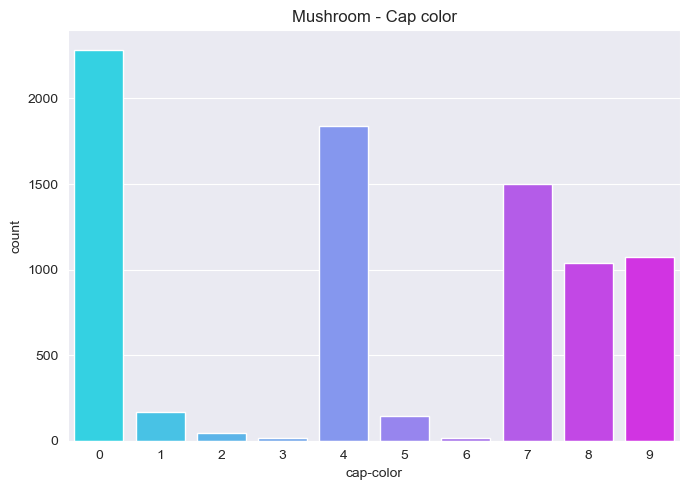

In [32]:
# Cap color
plt.figure(figsize=(7, 5))
plt.title("Mushroom - Cap color")
plt.xlabel("Color")
plt.ylabel("Count")

sns.countplot(data=df, x=df["cap-color"], palette="cool")
plt.tight_layout()
plt.show()

In [33]:
X.shape

(8124, 22)

In [34]:
type(X)

pandas.core.frame.DataFrame

In [35]:
y.shape

(8124,)

In [36]:
type(y)

pandas.core.series.Series

In [37]:
y.value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 8124 non-null   int32
 1   cap-surface               8124 non-null   int32
 2   cap-color                 8124 non-null   int32
 3   bruises                   8124 non-null   int64
 4   odor                      8124 non-null   int32
 5   gill-attachment           8124 non-null   int32
 6   gill-spacing              8124 non-null   int32
 7   gill-size                 8124 non-null   int32
 8   gill-color                8124 non-null   int32
 9   stalk-shape               8124 non-null   int32
 10  stalk-root                8124 non-null   int32
 11  stalk-surface-above-ring  8124 non-null   int32
 12  stalk-surface-below-ring  8124 non-null   int32
 13  stalk-color-above-ring    8124 non-null   int32
 14  stalk-color-below-ring    8124 non-null 

In [39]:
X.head(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,3,0,1,7,1,0,1,0,0,...,3,7,7,0,2,1,4,0,3,4
1,2,3,9,1,0,1,0,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,3,8,1,1,1,0,0,1,0,...,3,7,7,0,2,1,4,1,2,2
3,2,2,8,1,7,1,0,1,1,0,...,3,7,7,0,2,1,4,0,3,4
4,2,3,4,0,6,1,1,0,0,1,...,3,7,7,0,2,1,0,1,0,0


In [40]:
y.head(5)

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [42]:
print(f"X_train:{X_train.shape},\ny_train:{y_train.shape},\nX_test:{X_test.shape},\ny_test:{y_test.shape}")

X_train:(6499, 22),
y_train:(6499,),
X_test:(1625, 22),
y_test:(1625,)


#### Decision Tree Classifier

In [43]:
d_tree= DecisionTreeClassifier()
d_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred=d_tree.predict(X_test)

In [45]:
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [46]:
y_test

3927    1
2951    0
1154    1
6349    1
2174    0
       ..
864     0
7815    1
803     0
7919    0
5316    0
Name: class, Length: 1625, dtype: int32

In [47]:
from sklearn import metrics
print("Decision tree accuracy score",metrics.accuracy_score(y_pred,y_test))

Decision tree accuracy score 1.0


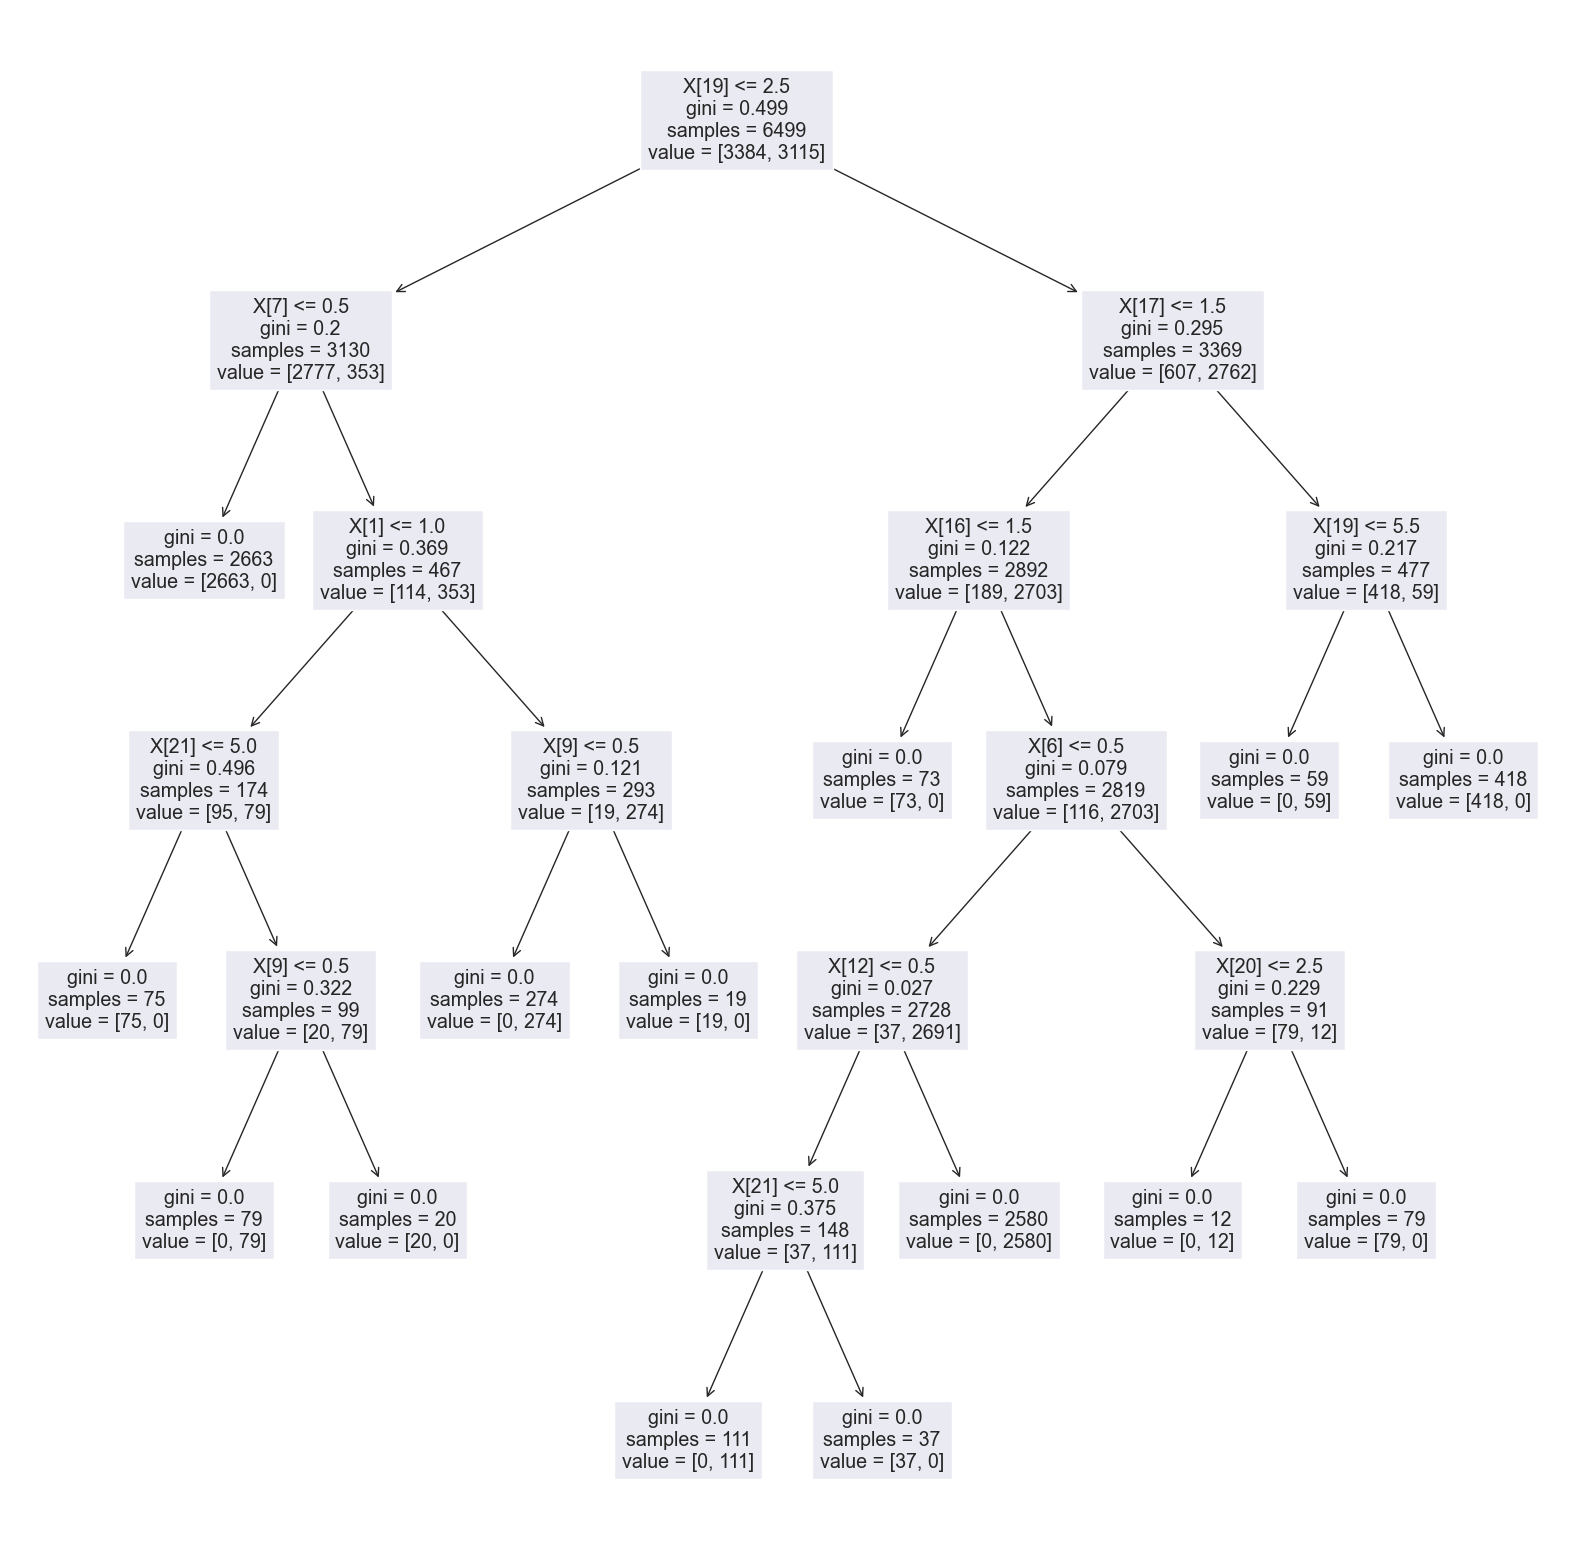

In [48]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(d_tree)
plt.show()

In [49]:
feature_imp= pd.Series(d_tree.feature_importances_,index=X_train.columns).sort_values(ascending=False)

In [50]:
feature_imp

spore-print-color           0.531974
ring-number                 0.166024
gill-size                   0.139964
veil-color                  0.040335
gill-spacing                0.039650
habitat                     0.033862
stalk-shape                 0.020794
cap-surface                 0.015581
population                  0.006423
stalk-surface-below-ring    0.005394
stalk-color-below-ring      0.000000
ring-type                   0.000000
veil-type                   0.000000
cap-shape                   0.000000
stalk-color-above-ring      0.000000
stalk-root                  0.000000
gill-color                  0.000000
gill-attachment             0.000000
odor                        0.000000
bruises                     0.000000
cap-color                   0.000000
stalk-surface-above-ring    0.000000
dtype: float64

<AxesSubplot:>

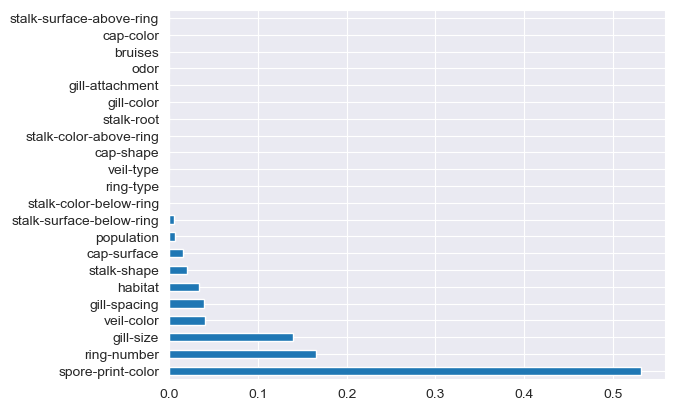

In [51]:
feature_imp.plot(kind='barh')

In [52]:
def categorical_relationship(df: pd.DataFrame, col: pd.Series, hue: pd.Series) -> sns.catplot:
    plt.figure(figsize=(15,8))

    df1 = df.groupby(col)[hue].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename("percentage").reset_index()

    fig = sns.catplot(
        data=df1,
        x=col,
        y="percentage",
        hue=hue,
        kind="bar",
        palette="rocket"
    )

    # Y axis limit
    fig.ax.set_ylim(0,100)

    # Text percentage
    for p in fig.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        fig.ax.text(txt_x,txt_y,txt)

<Figure size 1500x800 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


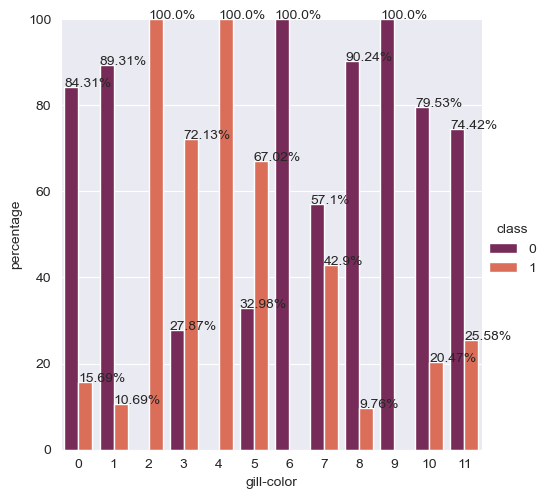

In [53]:
categorical_relationship(df, "gill-color", "class")

<Figure size 1500x800 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


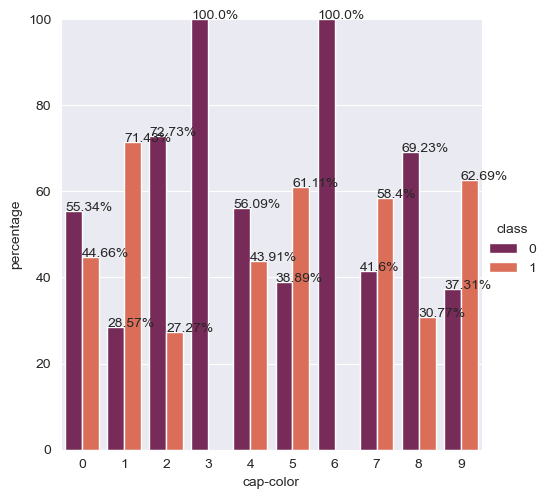

In [54]:
categorical_relationship(df, "cap-color", "class")

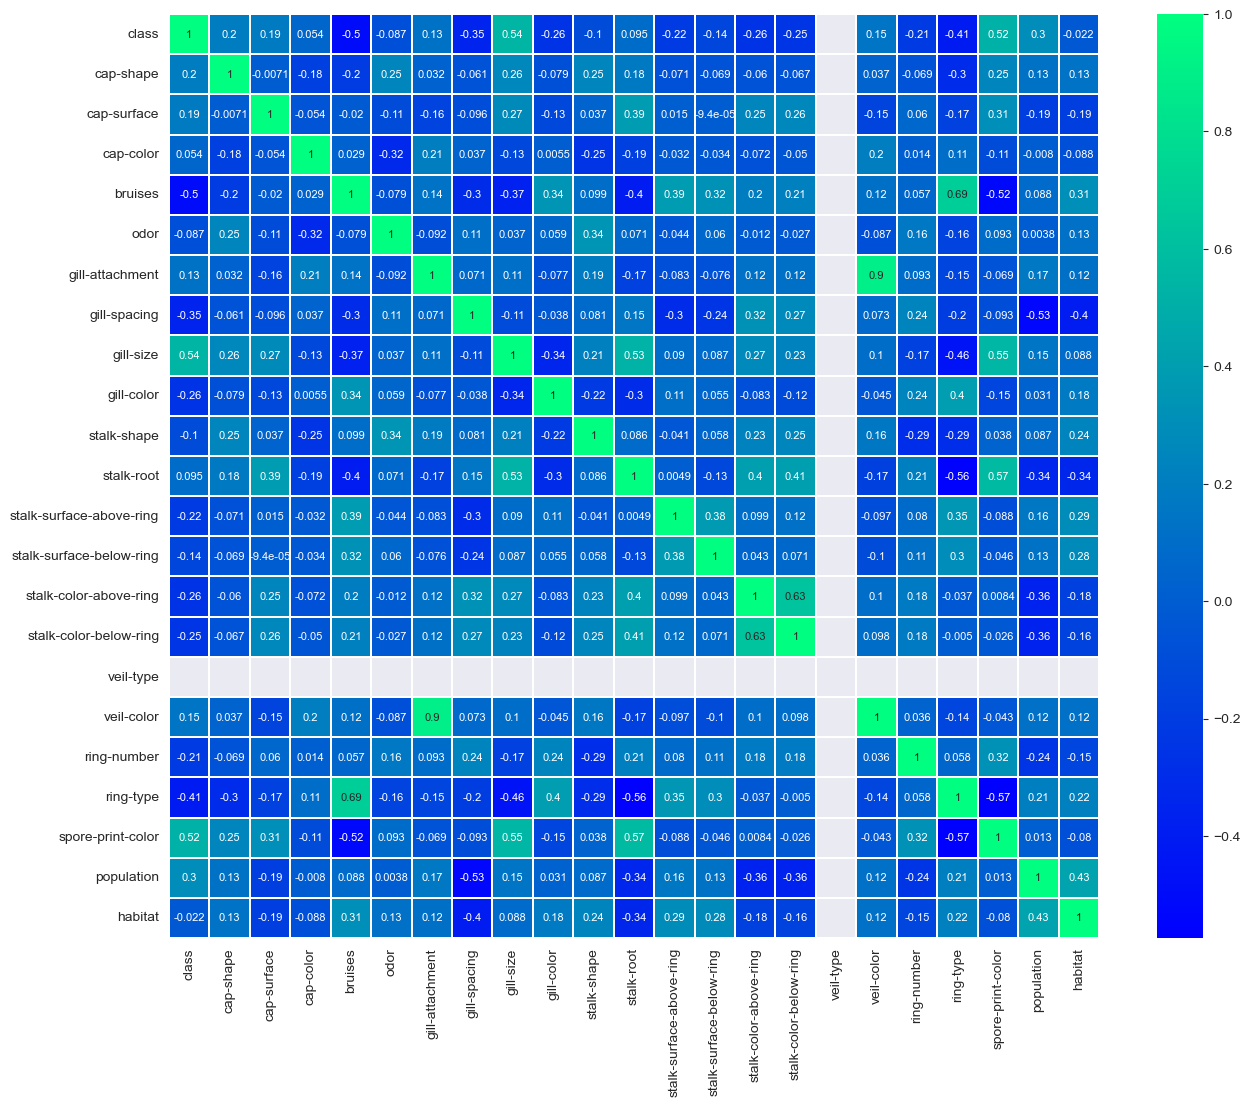

In [55]:
plt.figure(figsize=(15,12))

sns.heatmap(
    df.corr(),
    linewidths=.1,
    cmap="winter", 
    annot=True, 
    annot_kws={"size": 8}
)

plt.yticks(rotation=0);
plt.show()

##### KNN

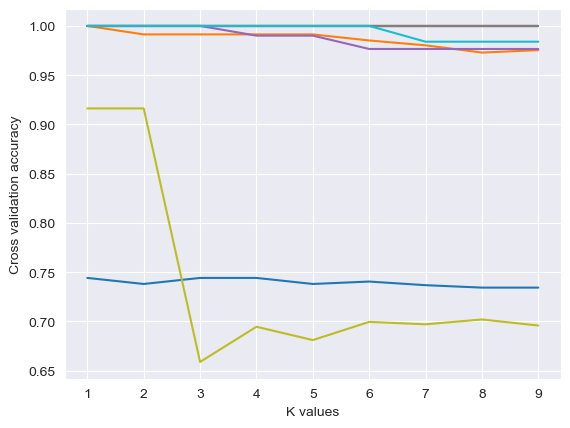

In [56]:
# Select the best tuning parameter
k_range = list(range(1, 10))
k_scores = []
for k in k_range:
    knn = KNN(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring="accuracy")
    k_scores.append(scores)

plt.plot(k_range, k_scores)
plt.xlabel("K values")
plt.ylabel("Cross validation accuracy")
plt.show()

In [57]:
# KNN model
knn = KNN(n_neighbors=1)
knn.fit(X_train, y_train)
print(f"Test accuracy: {knn.score(X_train, y_train)*100}%")

Test accuracy: 100.0%


In [58]:
cm= confusion_matrix(y_pred,y_test)
cm

array([[824,   0],
       [  0, 801]], dtype=int64)

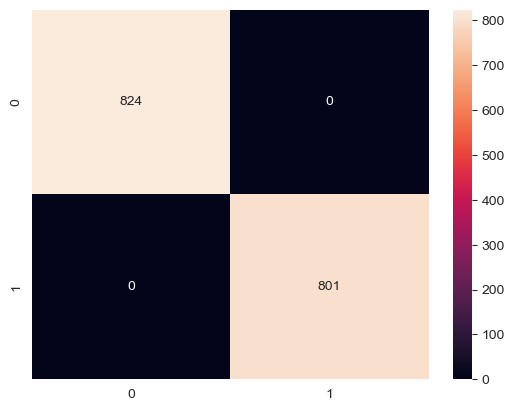

In [59]:
sns.heatmap(cm,annot=True,fmt='.0f')
plt.show()

In [60]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       824
           1       1.00      1.00      1.00       801

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



###### Support Vector  Machine Classifier

In [61]:
# testing different kernels
kernels = ["linear", "poly", "rbf", "sigmoid"]
for kernel in kernels:
    svc_classifier = SVC(kernel=kernel)
    svc_classifier.fit(X_train, y_train)
    if kernel == "linear":
        print(f"Test accuracy (linear kernel): {round(svc_classifier.score(X_train, y_train)*100, 2)}%")
    elif kernel == "poly":
        print(f"Test accuracy (poly kernel): {round(svc_classifier.score(X_train, y_train)*100, 2)}%")
    elif kernel == "rbf":
        print(f"Test accuracy (rbf kernel): {round(svc_classifier.score(X_train, y_train)*100, 2)}%")
    else:
        print(f"Test accuracy (sigmoid kernel): {round(svc_classifier.score(X_train, y_train)*100, 2)}%")

Test accuracy (linear kernel): 97.75%
Test accuracy (poly kernel): 100.0%
Test accuracy (rbf kernel): 100.0%
Test accuracy (sigmoid kernel): 65.7%


THANK YOU